# Pull requests statistics

In this notebook we compute some statistics regarding the characteristics of the pull requests to some popular open source Java projects on Github.

In [60]:
import pandas as pd
import matplotlib
%matplotlib inline

The pull request data is stored in CSV files containing one row for each pull request.

In [61]:
import glob
print(glob.glob("*withPackageInfo.csv"))

['output_mockito_mockito_withPackageInfo.csv', 'output_Netflix_Hystrix_withPackageInfo.csv', 'output_alibaba_fastjson_withPackageInfo.csv', 'output_alibaba_dubbo_withPackageInfo.csv', 'output_square_okhttp_withPackageInfo.csv', 'output_square_retrofit_withPackageInfo.csv']


We start with the **square/okhttp** repository.

## square/http

First, we load the dataset into a Pandas dataframe. Then we have a peek at it.

In [62]:
df_okhttp = pd.read_csv('output_square_okhttp_withPackageInfo.csv')
df_okhttp.head()

,id,number,title,mergeCommit,changedFiles,changedPackages
0,MDExOlB1bGxSZXF1ZXN0MTg2MzIxMA==,1,Initial import.,f56cbd22368ad4b5d6652f29647d63fc2ea08f40,63,NaN
1,MDExOlB1bGxSZXF1ZXN0MTg2MzM3OQ==,2,Give the in-progress code a SNAPSHOT version n...,37de950ccc0342a2e776b23207d1f0a41c4e1173,1,NaN
2,MDExOlB1bGxSZXF1ZXN0MTg2MzcwOA==,3,Enforce javac version 1.7 or better.,7f84db4a4679b71a0f8b2bc500570a3d9d90c851,1,NaN
3,MDExOlB1bGxSZXF1ZXN0MTg2NDg0Mw==,4,Don't connect to external hosts in unit tests.,57cb8a8813d97242617497afd30e7711a599a51a,1,NaN
4,MDExOlB1bGxSZXF1ZXN0MTg2NDkxNg==,5,Don't sign artifacts in the default configurat...,a08e68150d8f3552c6bc1a3fa4feb475a34d4b27,1,NaN


The columns are the following:
- `id` is a unique identifier of the pull request for Github
- `number` is the number of the pull request
- `title` is its title
- `mergeCommit` is the SHA1 hash of the commit that merged the pull request into the main branch
- `changedFiles` is the number of changed files in the pull request as obtained through the Github API
- `changedPackaged` is the number of changed packages in the pull request. Unfortunately it turns out that some of the `mergeCommit` hashes returned by the API are not valid. This is not really documented so we have to live with it. In that case the `changedPackages` column is Null because it's not possible to compute this value.

Now we check the number of pull requests, and the number of PRs for which it was possible to compute the changed packages info.

In [63]:
print(f'Total PRs: {len(df_okhttp)}\nPRs with changed packages info: {df_okhttp.changedPackages.notnull().sum()}')

Total PRs: 1058
PRs with changed packages info: 321


Now we're ready to compute some statistics regarding the number of changed files and changed packages in the pull requests.

In [64]:
df_okhttp.changedFiles.describe()

count    1058.000000
mean        5.933837
std        12.904180
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       252.000000
Name: changedFiles, dtype: float64

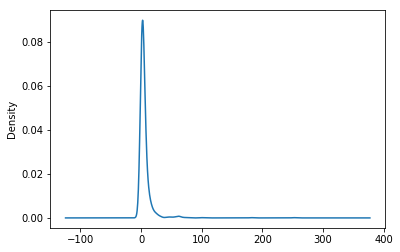

In [65]:
df_okhttp.changedFiles.plot.kde()

In [66]:
df_okhttp.changedPackages.describe()

count    321.000000
mean       1.971963
std        1.946750
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       16.000000
Name: changedPackages, dtype: float64

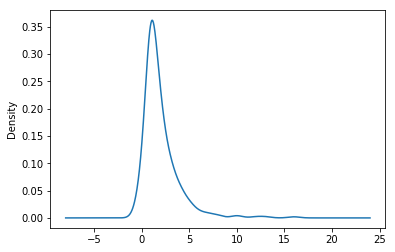

In [67]:
df_okhttp.changedPackages.plot.kde()

## alibaba/fastjson

In [68]:
df_fastjson = pd.read_csv('output_alibaba_fastjson_withPackageInfo.csv')
print(f'Total PRs: {len(df_fastjson)}\nPRs with changed packages info: {df_fastjson.changedPackages.notnull().sum()}')

Total PRs: 143
PRs with changed packages info: 128


In [69]:
df_fastjson.changedFiles.describe()

count    143.000000
mean       3.034965
std        2.633513
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: changedFiles, dtype: float64

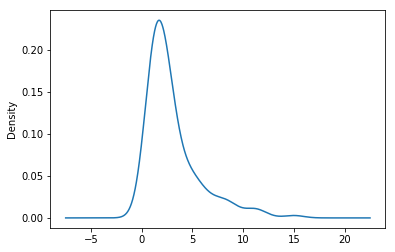

In [70]:
df_fastjson.changedFiles.plot.kde()

In [71]:
df_fastjson.changedPackages.describe()

count    128.000000
mean       2.007812
std        1.428044
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: changedPackages, dtype: float64

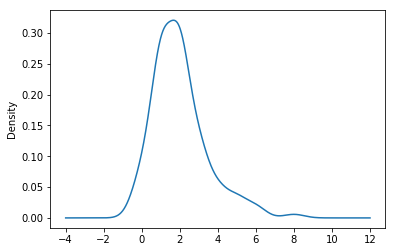

In [72]:
df_fastjson.changedPackages.plot.kde()

In [73]:
df_dubbo = pd.read_csv('output_alibaba_dubbo_withPackageInfo.csv')
print(f'Total PRs: {len(df_dubbo)}\nPRs with changed packages info: {df_dubbo.changedPackages.notnull().sum()}')

Total PRs: 94
PRs with changed packages info: 87


In [74]:
df_dubbo.changedFiles.describe()

count     94.000000
mean      18.212766
std       61.229495
min        1.000000
25%        1.000000
50%        2.000000
75%        8.000000
max      522.000000
Name: changedFiles, dtype: float64

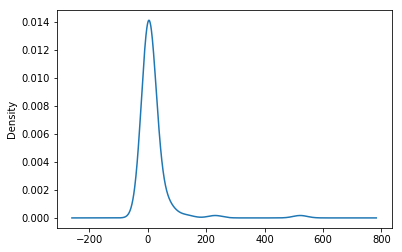

In [75]:
df_dubbo.changedFiles.plot.kde()

In [76]:
df_dubbo.changedPackages.describe()

count    87.000000
mean      3.517241
std       6.713163
min       0.000000
25%       1.000000
50%       1.000000
75%       3.000000
max      43.000000
Name: changedPackages, dtype: float64

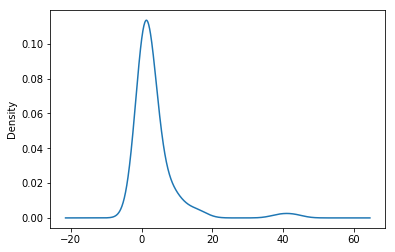

In [77]:
df_dubbo.changedPackages.plot.kde()

In [78]:
df_Hystrix = pd.read_csv('output_Netflix_Hystrix_withPackageInfo.csv')
print(f'Total PRs: {len(df_Hystrix)}\nPRs with changed packages info: {df_Hystrix.changedPackages.notnull().sum()}')

Total PRs: 431
PRs with changed packages info: 169


In [79]:
df_Hystrix.changedFiles.describe()

count    431.000000
mean       5.248260
std       11.107763
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      149.000000
Name: changedFiles, dtype: float64

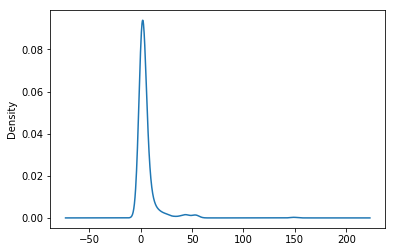

In [80]:
df_Hystrix.changedFiles.plot.kde()

In [81]:
df_Hystrix.changedPackages.describe()

count    169.000000
mean       1.905325
std        3.115328
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       32.000000
Name: changedPackages, dtype: float64

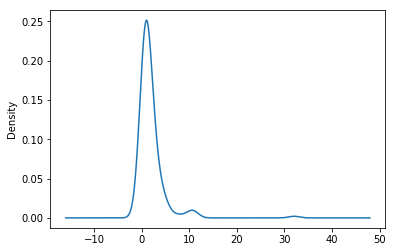

In [82]:
df_Hystrix.changedPackages.plot.kde()

In [83]:
df_mockito = pd.read_csv('output_mockito_mockito_withPackageInfo.csv')
print(f'Total PRs: {len(df_mockito)}\nPRs with changed packages info: {df_mockito.changedPackages.notnull().sum()}')

Total PRs: 406
PRs with changed packages info: 370


In [84]:
df_mockito.changedFiles.describe()

count    406.000000
mean      10.687192
std       35.942728
min        1.000000
25%        1.000000
50%        2.500000
75%        6.000000
max      375.000000
Name: changedFiles, dtype: float64

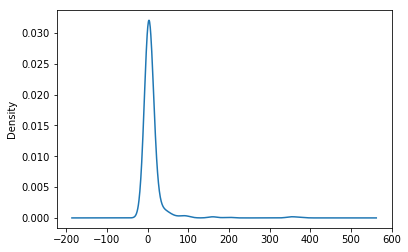

In [85]:
df_mockito.changedFiles.plot.kde()

In [86]:
df_mockito.changedPackages.describe()

count    370.000000
mean       4.067568
std        9.999365
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       83.000000
Name: changedPackages, dtype: float64

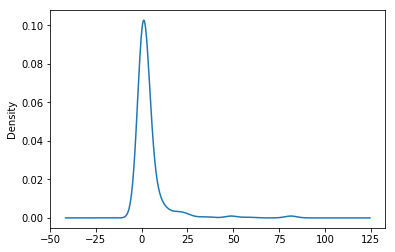

In [87]:
df_mockito.changedPackages.plot.kde()

In [88]:
df_retrofit = pd.read_csv('output_square_retrofit_withPackageInfo.csv')
print(f'Total PRs: {len(df_retrofit)}\nPRs with changed packages info: {df_retrofit.changedPackages.notnull().sum()}')

Total PRs: 439
PRs with changed packages info: 111


In [89]:
df_retrofit.changedFiles.describe()

count    439.000000
mean       5.703872
std        9.167331
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max      101.000000
Name: changedFiles, dtype: float64

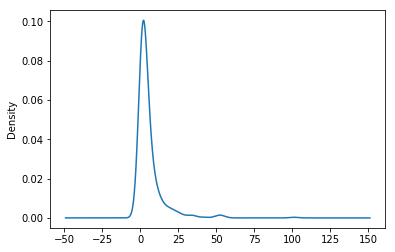

In [90]:
df_retrofit.changedFiles.plot.kde()

In [91]:
df_retrofit.changedPackages.describe()

count    111.000000
mean       1.072072
std        1.517844
min        0.000000
25%        0.500000
50%        1.000000
75%        1.000000
max       13.000000
Name: changedPackages, dtype: float64

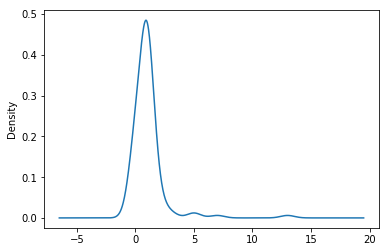

In [92]:
df_retrofit.changedPackages.plot.kde()